In [1]:
# run ipython with this command: jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
import matplotlib
import brewer2mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout,Flatten
from keras.optimizers import SGD
from keras.activations import relu, tanh, elu
from keras.backend import clear_session
from keras.models import load_model

set3 = brewer2mpl.get_map('Set3', 'qualitative', 7).mpl_colors
% matplotlib inline

Using TensorFlow backend.


In [2]:
train_data_x = pd.read_pickle('normalized_fer2013.pkl')
train_data_y = pd.read_pickle('normalized_fer2013_labels.pkl').astype(int)
test_data_x = pd.read_pickle('normalized_test_fer2013.pkl')
test_data_y = pd.read_pickle('normalized_test_fer2013_labels.pkl').astype(int)

In [3]:
train_data_x = train_data_x.as_matrix().reshape((-1,48,48,1))
test_data_x = test_data_x.as_matrix().reshape((-1,48,48,1))

In [4]:
train_data_y = train_data_y.as_matrix()
test_data_y = test_data_y.as_matrix()

In [5]:
train_data_y = keras.utils.to_categorical(train_data_y, num_classes=7)
test_data_y = keras.utils.to_categorical(test_data_y, num_classes=7)

<font size = 20pt>__Training Process__</font>

In [46]:
import random
partition = 5
train_sets = [[] for i in range(partition)]
pop = range(len(train_data_y))
for i in range(partition - 1):
    train_sets[i] = random.sample(pop, len(train_data_y) // partition)
    pop = [j for j in pop if j not in train_sets[i]]
train_sets[partition - 1] = pop

print([len(train_sets[i]) for i in range(partition)])

[5741, 5741, 5741, 5741, 5745]


In [48]:
clear_session()
model = keras.models.Sequential()

model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same',input_shape=(48,48,1)))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(2,2),activation='elu',padding='valid'))

model.add(Conv2D(16, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(16, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(16, (2,2), strides=(2,2),activation='elu',padding='valid'))

model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(8, (2,2), strides=(1,1),activation='elu',padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='elu'))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')

In [49]:
period = 50 // partition  # total iterations to cycle through all partitions is at most 50 iterations
for i in range(1000):
    print("EPOCH " + str((i)*period+1))
    train = []
    for j in range(partition):
        if j != i % partition:
            train += train_sets[j]
    
    model.fit(train_data_x[train,:,:,:], train_data_y[train], 
              validation_data=(train_data_x[train_sets[i%partition],:,:,:],train_data_y[train_sets[i%partition]]),
              epochs=period, batch_size=32)

EPOCH 1
Train on 22968 samples, validate on 5741 samples
Epoch 1/10
22968/22968 [==============================] - 201s - loss: 1.7676 - acc: 0.2769 - val_loss: 1.6819 - val_acc: 0.3262
Epoch 2/10
22968/22968 [==============================] - 258s - loss: 1.7016 - acc: 0.3203 - val_loss: 1.6580 - val_acc: 0.3449
Epoch 3/10
22968/22968 [==============================] - 208s - loss: 1.6649 - acc: 0.3391 - val_loss: 1.6045 - val_acc: 0.3679
Epoch 4/10
22968/22968 [==============================] - 182s - loss: 1.6155 - acc: 0.3662 - val_loss: 1.5700 - val_acc: 0.3998
Epoch 5/10
22968/22968 [==============================] - 167s - loss: 1.5693 - acc: 0.3894 - val_loss: 1.5012 - val_acc: 0.4275
Epoch 6/10
22968/22968 [==============================] - 229s - loss: 1.5384 - acc: 0.3966 - val_loss: 1.4836 - val_acc: 0.4196
Epoch 7/10
22968/22968 [==============================] - 307s - loss: 1.5115 - acc: 0.4125 - val_loss: 1.4629 - val_acc: 0.4313
Epoch 8/10
22968/22968 [================

22968/22968 [==============================] - 176s - loss: 1.2823 - acc: 0.5043 - val_loss: 1.1686 - val_acc: 0.5546
Epoch 2/10
22968/22968 [==============================] - 175s - loss: 1.2848 - acc: 0.5030 - val_loss: 1.1636 - val_acc: 0.5525
Epoch 3/10
22968/22968 [==============================] - 175s - loss: 1.2788 - acc: 0.5084 - val_loss: 1.1863 - val_acc: 0.5407
Epoch 4/10
22968/22968 [==============================] - 174s - loss: 1.2674 - acc: 0.5083 - val_loss: 1.1915 - val_acc: 0.5426
Epoch 5/10
22968/22968 [==============================] - 172s - loss: 1.2742 - acc: 0.5119 - val_loss: 1.2032 - val_acc: 0.5457
Epoch 6/10
22968/22968 [==============================] - 175s - loss: 1.2755 - acc: 0.5054 - val_loss: 1.1970 - val_acc: 0.5353
Epoch 7/10
22968/22968 [==============================] - 175s - loss: 1.2660 - acc: 0.5099 - val_loss: 1.2088 - val_acc: 0.5339
Epoch 8/10
22968/22968 [==============================] - 174s - loss: 1.2694 - acc: 0.5130 - val_loss: 1.19

22968/22968 [==============================] - 148s - loss: 1.2249 - acc: 0.5300 - val_loss: 1.0599 - val_acc: 0.5908
Epoch 2/10
22968/22968 [==============================] - 149s - loss: 1.2208 - acc: 0.5337 - val_loss: 1.1061 - val_acc: 0.576453
Epoch 3/10
22968/22968 [==============================] - 149s - loss: 1.2222 - acc: 0.5323 - val_loss: 1.0866 - val_acc: 0.5839
Epoch 4/10
22968/22968 [==============================] - 149s - loss: 1.2260 - acc: 0.5323 - val_loss: 1.0948 - val_acc: 0.5802
Epoch 5/10
22968/22968 [==============================] - 149s - loss: 1.2184 - acc: 0.5354 - val_loss: 1.1199 - val_acc: 0.5708
Epoch 6/10
22968/22968 [==============================] - 149s - loss: 1.2179 - acc: 0.5332 - val_loss: 1.1171 - val_acc: 0.5671
Epoch 7/10
22968/22968 [==============================] - 149s - loss: 1.2130 - acc: 0.5390 - val_loss: 1.1317 - val_acc: 0.5611
Epoch 8/10
22968/22968 [==============================] - 149s - loss: 1.2144 - acc: 0.5335 - val_loss: 1.

22968/22968 [==============================] - 149s - loss: 1.2065 - acc: 0.5380 - val_loss: 1.0252 - val_acc: 0.6137
Epoch 2/10
22968/22968 [==============================] - 149s - loss: 1.2096 - acc: 0.5372 - val_loss: 1.0469 - val_acc: 0.6046
Epoch 3/10
22968/22968 [==============================] - 149s - loss: 1.2005 - acc: 0.5396 - val_loss: 1.0699 - val_acc: 0.5954
Epoch 4/10
22968/22968 [==============================] - 149s - loss: 1.2004 - acc: 0.5373 - val_loss: 1.0827 - val_acc: 0.5898
Epoch 5/10
22968/22968 [==============================] - 149s - loss: 1.2009 - acc: 0.5422 - val_loss: 1.0780 - val_acc: 0.5941
Epoch 6/10
22968/22968 [==============================] - 150s - loss: 1.1987 - acc: 0.5401 - val_loss: 1.0811 - val_acc: 0.5905
Epoch 7/10
22968/22968 [==============================] - 149s - loss: 1.1905 - acc: 0.5435 - val_loss: 1.0846 - val_acc: 0.5865
Epoch 8/10
22968/22968 [==============================] - 149s - loss: 1.1955 - acc: 0.5399 - val_loss: 1.08

22968/22968 [==============================] - 151s - loss: 1.1912 - acc: 0.5416 - val_loss: 1.0116 - val_acc: 0.6110
Epoch 2/10
22968/22968 [==============================] - 151s - loss: 1.1938 - acc: 0.5425 - val_loss: 1.0351 - val_acc: 0.6088
Epoch 3/10
22968/22968 [==============================] - 151s - loss: 1.1839 - acc: 0.5438 - val_loss: 1.0398 - val_acc: 0.6076
Epoch 4/10
22968/22968 [==============================] - 151s - loss: 1.1865 - acc: 0.5456 - val_loss: 1.0369 - val_acc: 0.6072
Epoch 5/10
22968/22968 [==============================] - 151s - loss: 1.1840 - acc: 0.5460 - val_loss: 1.0483 - val_acc: 0.6049
Epoch 6/10
22968/22968 [==============================] - 151s - loss: 1.1855 - acc: 0.5469 - val_loss: 1.0396 - val_acc: 0.6043
Epoch 7/10
22968/22968 [==============================] - 151s - loss: 1.1763 - acc: 0.5438 - val_loss: 1.0526 - val_acc: 0.5999
Epoch 8/10
22968/22968 [==============================] - 151s - loss: 1.1865 - acc: 0.5434 - val_loss: 1.06

22964/22964 [==============================] - 151s - loss: 1.1867 - acc: 0.5482 - val_loss: 1.0132 - val_acc: 0.6124
Epoch 2/10
22964/22964 [==============================] - 150s - loss: 1.1845 - acc: 0.5469 - val_loss: 1.0114 - val_acc: 0.6151
Epoch 3/10
22964/22964 [==============================] - 151s - loss: 1.1789 - acc: 0.5486 - val_loss: 1.0375 - val_acc: 0.6007
Epoch 4/10
22964/22964 [==============================] - 151s - loss: 1.1759 - acc: 0.5496 - val_loss: 1.0310 - val_acc: 0.6023
Epoch 5/10
22964/22964 [==============================] - 151s - loss: 1.1794 - acc: 0.5480 - val_loss: 1.0563 - val_acc: 0.5967
Epoch 6/10
22964/22964 [==============================] - 151s - loss: 1.1786 - acc: 0.5520 - val_loss: 1.0550 - val_acc: 0.5943
Epoch 7/10
22964/22964 [==============================] - 152s - loss: 1.1828 - acc: 0.5517 - val_loss: 1.0681 - val_acc: 0.5882
Epoch 8/10
22964/22964 [==============================] - 151s - loss: 1.1745 - acc: 0.5496 - val_loss: 1.03

KeyboardInterrupt: 

In [50]:
addr = "ADAM8_8_8_8_8_16_16_16_16_16_8_8_8_8_8F32"

model.save(addr + ".h5")
model_json = model.to_json()
with open(addr + ".json", "w") as json_file:
    json_file.write(model_json)

<font size = 20pt>__Data Visualization__</font>

## Computer Vision

In [96]:
# load in the whole architecture, training methods, and weights with h5 file
addr = "ADAM_16_8_8_4F64_32_16"
model = load_model(addr + '.h5')

# # load the whole architecture stored in json and create model
# json_file = open(addr + '.json','r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)
# # load weights into model from h5 file
# model.load_weights(addr + '.h5')


# evaluate model on test set
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(test_data_x, test_data_y, verbose=0)
print("model %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

model acc: 49.32%


In [97]:
# displays image[start:end]
def overview(start, end, X, pic_size):
    fig = plt.figure(figsize=(pic_size, pic_size))
    for i in range(start, end):
        input_img = X[i,:,:,:]
        ax = fig.add_subplot(10, 8,i+1)
        ax.imshow(input_img[:,:,0], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

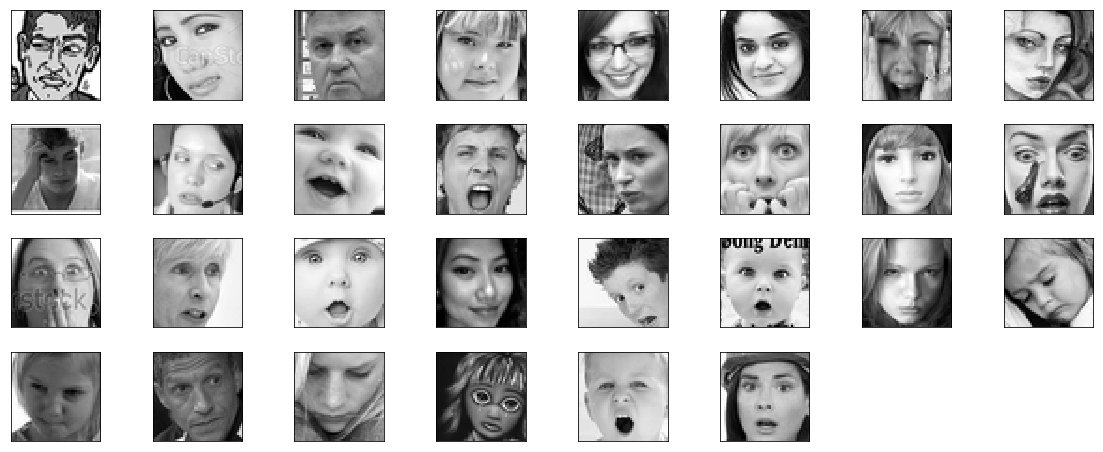

In [98]:
overview(0, 30, test_data_x, 16)

In [99]:
# display a single image
def single_image(target_image, X, pic_size):
    overview(target_image, target_image + 1, X, pic_size)

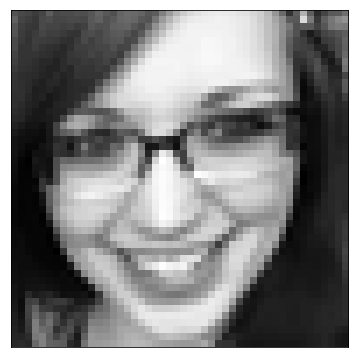

In [100]:
single_image(4, test_data_x, 50)

In [101]:
def plot_filter(layer, lay_index, pic_index, X):
    # create a cut-off CNN up to the nth layer
    temp_model = Sequential()
    for lay in range(lay_index + 1):
        temp_model.add(layers.deserialize({'class_name': layer[lay].__class__.__name__, 'config': layer[lay].get_config()}))
        temp_model.layers[lay].set_weights(layer[lay].get_weights())
    output = temp_model.predict(X)  # output the last layer (which is the desired output)

    # print out all output filters within the nth layer
    fig = plt.figure(figsize=(16, 16))
    print(output.shape)
    for i in range(len(output[pic_index][0][0])):
        input_img = output[pic_index,:,:,i]
        ax = fig.add_subplot((len(output[pic_index][0][0]) + 8) // 8, 8,i+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

# plot_filters(model.layers, 0, 0, test_data_x)
# plot_filters(model.layers, 1, 0, test_data_x)
# plot_filters(model.layers, 3, 1, test_data_x)

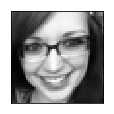



LAYER 1
(7178, 44, 44, 16)


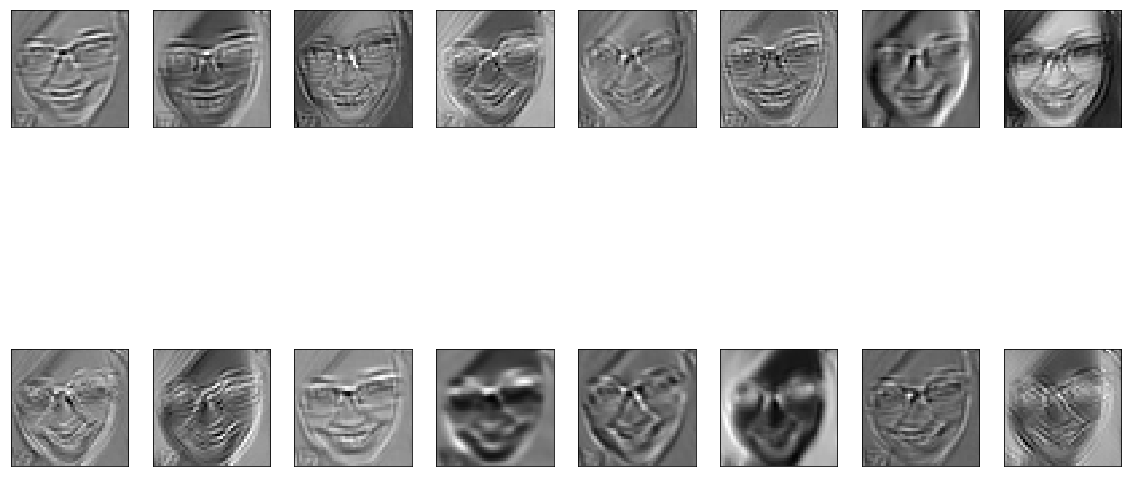



LAYER 2
(7178, 40, 40, 8)


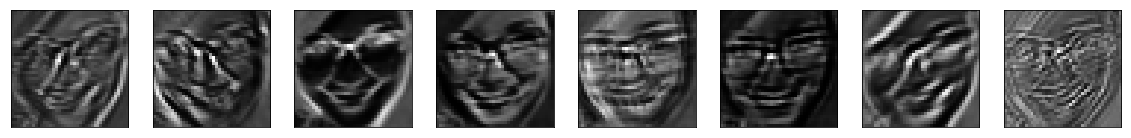



LAYER 3
(7178, 36, 36, 8)


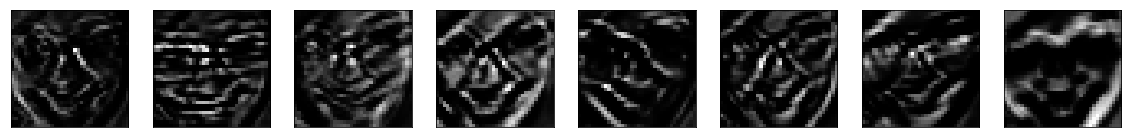



LAYER 4
(7178, 34, 34, 4)


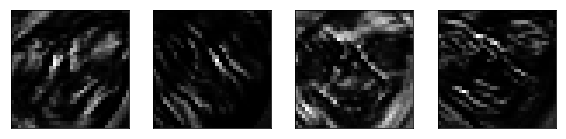

In [114]:
target_image = 4
single_image(target_image, test_data_x, 16)
for i in range(4):
    print("\n\nLAYER", i + 1)
    plot_filter(model.layers, i, target_image, test_data_x)

## Prediction Result

In [103]:
# prediction and true labels
y_prob = model.predict(test_data_x, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in test_data_y]

In [104]:
counts = np.bincount(y_pred)
labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print([[x, y] for x, y in zip(labels, counts)])

[['angry', 593], ['disgust', 43], ['fear', 777], ['happy', 1972], ['sad', 1516], ['surprise', 884], ['neutral', 1393]]


In [105]:
def plot_subjects(start, end, X, y_pred, y_true, title=False):
    fig = plt.figure(figsize=(16,16))
    emotion = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
    for i in range(start, end+1):
        input_img = X[i,:,:,:]
        ax = fig.add_subplot(10, 7, i+1)
        ax.imshow(input_img[:,:,0], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel(emotion[y_true[i]], color='#53b3cb',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=12)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [106]:
def plot_probs(start,end, X, y_prob):
    fig = plt.figure(figsize=(14,14))
    for i in range(start, end+1):
        input_img = X[i,:,:,:]
        ax = fig.add_subplot(10, 7, i+1)
        ax.bar(np.arange(0,7), y_prob[i], color=set3,alpha=0.5, edgecolor='black', linewidth=0.5)
        ax.set_xticks(np.arange(0,7,1))
        labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [107]:
def plot_subjects_with_probs(start, end, X, y_prob):
    iter = int((end - start)/7)
    for i in range(iter):
        plot_subjects(i*7,(i+1)*7-1, X, y_pred, y_true, title=False)
        plot_probs(i*7,(i+1)*7-1, X, y_prob)

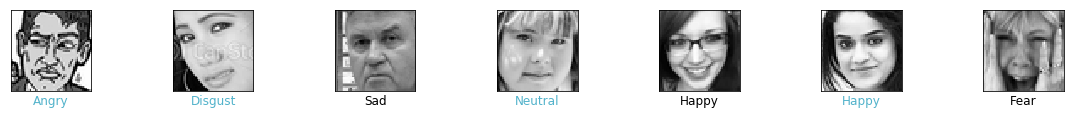

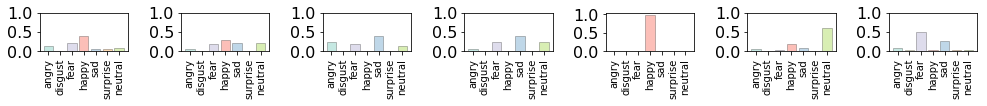

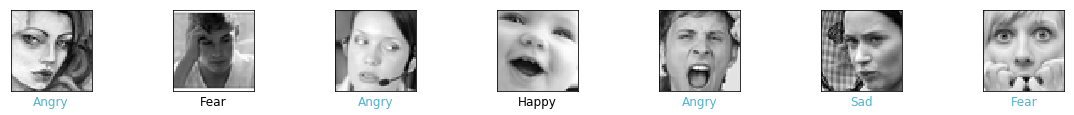

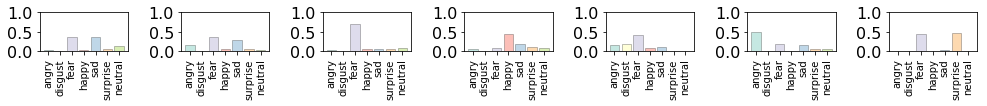

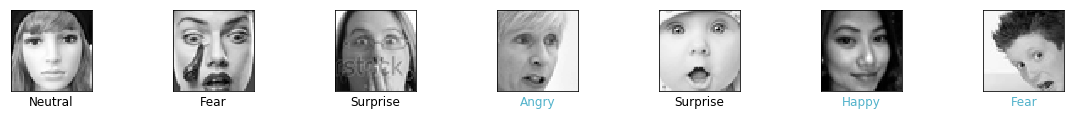

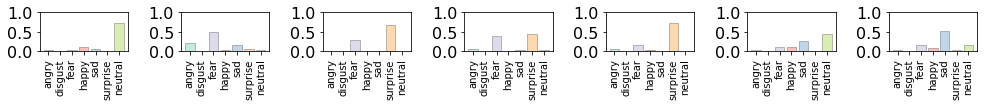

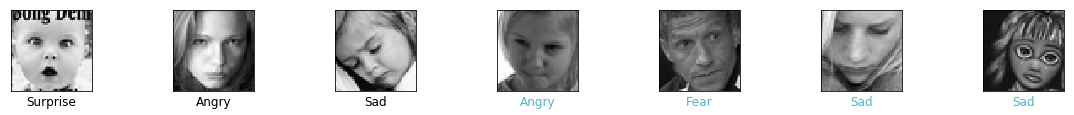

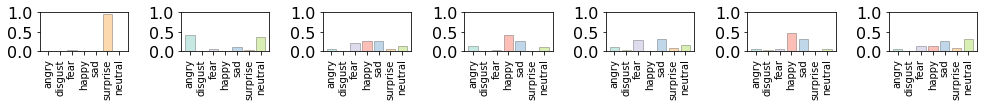

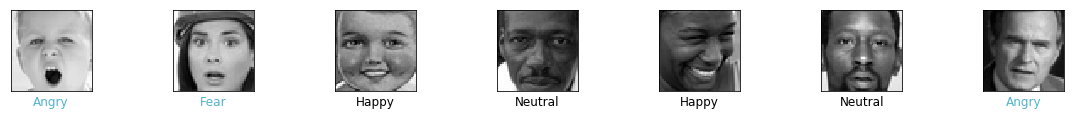

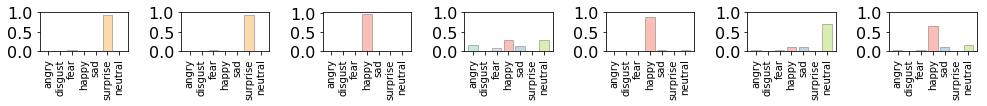

In [108]:
plot_subjects_with_probs(0, 36, test_data_x, y_prob)

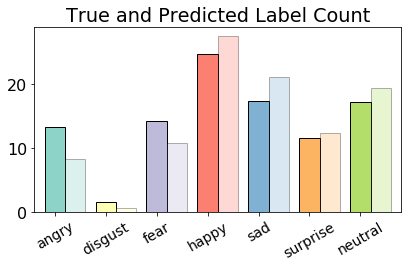

In [109]:
def plot_distribution(y_true, y_pred):
    ind = np.arange(1,8,1)  # the x locations for the groups
    width = 0.4
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true) / len(y_true) * 100, width, color=set3, alpha=1.0, edgecolor='black', linewidth=1)
    pred = ax.bar(ind + width, np.bincount(y_pred) / len(y_pred) * 100, width, color=set3, alpha=0.3, edgecolor='black', linewidth=1)
    ax.set_xticks(np.arange(1,8,1))
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.5 * width, 8 - 0.5*width])
    ax.set_title('True and Predicted Label Count')
    plt.tight_layout()
    plt.show()
    
plot_distribution(y_true, y_pred)

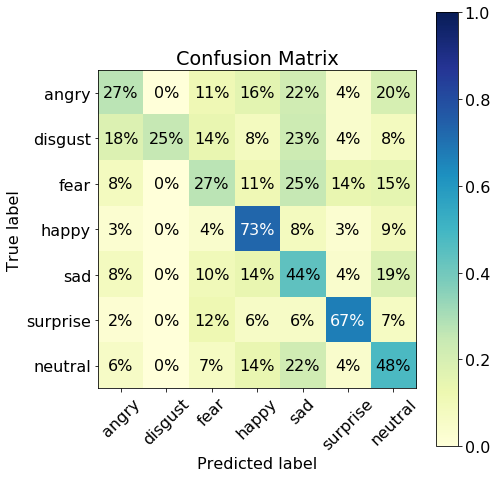

In [110]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]).round(2)
    fig = plt.figure(figsize=(7,7))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
    fig.colorbar(matrix) 
    thresh = 0.5
    for i in range(7):
        for j in range(7):  
            ax.text(j,i, str(int(cm[i,j]*100)) + "%",va='center', ha='center', color="white" if cm[i, j] > thresh else "black")
    ax.set_title('Confusion Matrix')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)

## Classification Metrics

In [111]:
def class_precision(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    col = [cm[j,i] for j in range(7)]
    return float(col[i])/sum(col)

def class_recall(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    row = [cm[i,j] for j in range(7)]
    return float(row[i])/sum(row)

def class_accuracy(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    tp = cm[i,i]
    fn = sum([cm[i,j] for j in range(7) if j != i])
    fp = sum([cm[j,i] for j in range(7) if j != i])
    tn = sum([cm[i,j] for j in range(7) for i in range(0,6)]) -(tp+fp+fn)
    return float(tp + tn)/sum([tp, fn, fp, tn])

In [112]:
for emotion in labels:
    print(emotion)
    print('   acc = {}'.format(class_accuracy(y_true, y_pred, emotion)))
    print('  prec = {}'.format(class_precision(y_true, y_pred, emotion)))
    print('recall = {}\n'.format(class_recall(y_true, y_pred, emotion)))

angry
   acc = 0.8245584524810765
  prec = 0.42833052276559863
recall = 0.2651356993736952

disgust
   acc = 0.983515559293524
  prec = 0.6511627906976745
recall = 0.25225225225225223

fear
   acc = 0.7885618166526492
  prec = 0.35006435006435005
recall = 0.265625

happy
   acc = 0.8052144659377628
  prec = 0.6561866125760649
recall = 0.7294250281848929

sad
   acc = 0.719259882253995
  prec = 0.3608179419525066
recall = 0.43865276663993585

surprise
   acc = 0.8978973927670311
  prec = 0.6266968325791855
recall = 0.6666666666666666

neutral
   acc = 0.7571068124474348
  prec = 0.42426417803302224
recall = 0.4793187347931874



In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=labels))

             precision    recall  f1-score   support

      angry       0.43      0.27      0.33       958
    disgust       0.65      0.25      0.36       111
       fear       0.35      0.27      0.30      1024
      happy       0.66      0.73      0.69      1774
        sad       0.36      0.44      0.40      1247
   surprise       0.63      0.67      0.65       831
    neutral       0.42      0.48      0.45      1233

avg / total       0.49      0.49      0.48      7178

